In [1]:
"""\
# Copyright (C) 2025 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python3 -V || python -V

Python 3.10.12


In [231]:
import os
import numpy as np
from numpy import linalg as LA

# Plotting
import matplotlib.pyplot as plt
from seaborn import color_palette

# Animations
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.patches as patches

# Formations control simulation frames
from afc.sf_complex import sim_frame_complex
from afc.sf_affine import sim_frame_affine
from afc.sf_affine_complex import sim_frame_affine_complex

# Happy pdf for a happy submission without 
# complains in paperplaza, arxiv, etc
import matplotlib

font = {'size' : 16}
matplotlib.rc('font', **font)

## Formations in $\mathbb{C}^1$ - Complex laplacian 

### Square

In [22]:
## Parameters #####
n = 4
Z = ((1,2), (2,3), (3,4), (4,1))
p_star = [0-1j, 1+0j, 0+1j, -1+0j] # square
p0 = [-10-1j, 4-2j, 0+4j, -0.5+0.5j]
tf = 4
h = 0.1
K = np.eye(n)

## Generate the simulation frame #####
args = {"n":n, "Z":Z, "p_star":p_star, "p0":p0, "tf":tf, "h":h, "K":K, "p1":(1 + 2j), "debug":True}
sim_fr = sim_frame_complex(**args)

B = 
 [[-1.  0.  0.  1.]
 [ 1. -1.  0.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  1. -1.]]
L = 
 [[ 2.+4.j -3.-1.j  0.+0.j  1.-3.j]
 [-3.-1.j  4.-2.j -1.+3.j  0.+0.j]
 [ 0.+0.j  1.-3.j  2.+4.j -3.-1.j]
 [-1.+3.j  0.+0.j -3.-1.j  4.-2.j]]

L eigenvalues:
lambda_0 = -6.000000-2.000000j
lambda_1 = 0.000000+0.000000j
lambda_2 = -6.000000-2.000000j
lambda_3 = 0.000000+0.000000j


In [3]:
sim_fr.check_eigen_vectors()

L@1_n = 
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
L@p^star = 
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
L@Re(p^*) = 
 [-4.+2.j  4.-2.j  4.-2.j -4.+2.j]
L@Im(p^*) = 
 [-2.-4.j  2.+4.j  2.+4.j -2.-4.j]
 ------------ 



v_f = 
 [0.2+0.j 0.2+0.j 0.2+0.j 0.2+0.j]

M = 
 [[ 0.1-0.1j  0. +0.j   0. +0.j   0. +0.j ]
 [ 0.1-0.1j -0. -0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j  -0.1-0.1j -0. -0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j   0.1+0.1j]]

L@1_n = 
 [[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]

L@v_f = 
 [[-5.55111512e-17+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+5.55111512e-17j]]

L eigenvalues:
lambda_0 = -7.000000-3.000000j
lambda_1 = 0.000000+0.000000j
lambda_2 = -0.000000-0.000000j
lambda_3 = -7.000000-3.000000j


100%|██████████| 4000/4000 [00:00<00:00, 215711.99it/s]


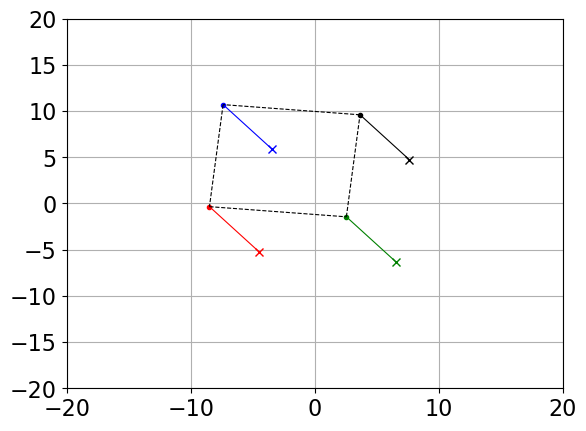

In [32]:
## Launch the simulation and plot #####
sim_fr.set_velocity(0.2, 0, 0, 0)

sim_fr.numerical_simulation()
sim_fr.plot()

### Line

In [147]:
## Parameters #####
n = 4
Z = ((1,2), (2,3), (3,4), (4,1))
p_star = [-2+0j, -1+0j, 1+0j, 2+0j] # square
p0 = [-10-1j, 4-2j, 0+4j, -0.5+0.5j]
tf = 5
h = 2
K = np.eye(n)

## Generate the simulation frame #####
args = {"n":n, "Z":Z, "p_star":p_star, "p0":p0, "tf":tf, "h":h, "K":K, "p1":-2, "debug":True}
sim_fr = sim_frame_complex(**args)

B = 
 [[-1.  0.  0.  1.]
 [ 1. -1.  0.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  1. -1.]]
L = 
 [[ 6.+0.j -8.-0.j  0.+0.j  2.-0.j]
 [-4.-0.j  6.+0.j -2.-0.j  0.+0.j]
 [ 0.+0.j -2.-0.j  6.+0.j -4.-0.j]
 [ 2.-0.j  0.+0.j -8.-0.j  6.+0.j]]

L eigen_values:
lambda_0 = -12.000000-0.000000j
lambda_1 = 0.000000+0.000000j
lambda_2 = -12.000000+0.000000j
lambda_3 = 0.000000+0.000000j



v_f = 
 [0.-2.j 0.-1.j 0.+1.j 0.+2.j]

M = 
 [[ 0.-2.j   0.+0.j   0.+0.j   0.+0.j ]
 [ 0.-1.j  -0.-0.j   0.+0.j   0.+0.j ]
 [ 0.+0.j   0.+0.5j -0.-0.j   0.+0.j ]
 [ 0.+0.j   0.+0.j   0.+0.j  -0.-0.5j]]

L@1_n = 
 [[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]

L@v_f = 
 [[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]

L eigen_values:
lambda_0 = -12.000000+0.250000j
lambda_1 = -0.000000+0.500000j
lambda_2 = -0.000000-0.000000j
lambda_3 = -12.000000+0.250000j


100%|██████████| 5000/5000 [00:00<00:00, 185185.53it/s]


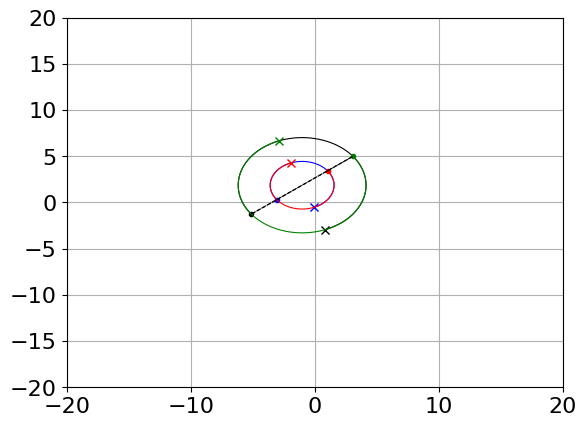

In [150]:
## Launch the simulation and plot #####
sim_fr.set_velocity(0, 0, 0, 1)

sim_fr.numerical_simulation()
sim_fr.plot()

## Affine formations in $R^2$

### Square

In [17]:
## Parameters #####
n = 4
#Z = ((1,2), (2,3), (3,4), (4,1))
Z = ((1,2), (1,3), (2,3), (2,4), (3,4), (4,1))
p_star = [[-1,-1], [-1,1], [1,1], [1,-1]] # square
p0 = [[-10,-3], [-5,-2], [10,4], [0,-5]]
tf = 2
h = 4
kappa=0.01
K = np.eye(n)

## Generate the simulation frame #####
args = {"n":n, "Z":Z, "p_star":p_star, "p0":p0, "tf":tf, "h":h, "kappa":kappa, "K":K, "debug":True}
sim_fr = sim_frame_affine(**args)

Failed to dualize the problem: 'float' object is not iterable
W (6, 6) = 
 [[ 0.25  0.    0.    0.    0.    0.  ]
 [ 0.   -0.25  0.    0.    0.    0.  ]
 [ 0.    0.    0.25  0.    0.    0.  ]
 [ 0.    0.    0.   -0.25  0.    0.  ]
 [ 0.    0.    0.    0.    0.25  0.  ]
 [ 0.    0.    0.    0.    0.    0.25]]
L (8, 8) = 
 [[ 0.25  0.   -0.25 -0.    0.25  0.   -0.25 -0.  ]
 [ 0.    0.25 -0.   -0.25  0.    0.25 -0.   -0.25]
 [-0.25 -0.    0.25  0.   -0.25 -0.    0.25  0.  ]
 [-0.   -0.25  0.    0.25 -0.   -0.25  0.    0.25]
 [ 0.25  0.   -0.25 -0.    0.25  0.   -0.25 -0.  ]
 [ 0.    0.25 -0.   -0.25  0.    0.25 -0.   -0.25]
 [-0.25 -0.    0.25  0.   -0.25 -0.    0.25  0.  ]
 [-0.   -0.25  0.    0.25 -0.   -0.25  0.    0.25]]
 --------- Eigen values
lambda_0 = 0.000000+0.000000j
lambda_1 = -1.000000+0.000000j
lambda_2 = -0.000000+0.000000j
lambda_3 = -1.000000+0.000000j
lambda_4 = 0.000000+0.000000j
lambda_5 = -0.000000+0.000000j
lambda_6 = 0.000000+0.000000j
lambda_7 = 0.000000-0.000000j


In [193]:
## Set a desired velocity vector stack (v_f^*) #####
vx = 0
vy = -40
a = 0

omega = 0
hx = 0
hy = 0

# "a" case
# omega = 1
# hx = 4
# hy = 2

# "b" case
# omega = -3
# hx = -4
# hy = 2

## Design the weights that gerenates such v_f^* #####
mu_matrix_x = np.array([[0,0,0,-1], [0,0,-1,0], [0,1,0,0], [1,0,0,0]])/2
mu_matrix_y = np.array([[0,-1,0,0], [1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

mu_matrix_a = np.array([[0,1,0,1], [1,0,1,0], [0,1,0,1], [1,0,1,0]])/2
mu_matrix_w = np.array([[0,1,0,-1], [-1,0,1,0], [0,-1,0,1], [1,0,-1,0]])/2
mu_matrix_hx = np.array([[0,0,0,1], [0,0,-1,0], [0,1,0,0], [-1,0,0,0]])/2
mu_matrix_hy = np.array([[0,1,0,0], [-1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

sim_fr.set_manual_mu(vx*mu_matrix_x + vy*mu_matrix_y + a*mu_matrix_a + omega*mu_matrix_w + 
                     hx*mu_matrix_hx + hy*mu_matrix_hy)

M (8, 12) B.T (6, 4) K_inv (8, 8)
M^bar@B^T^bar@p_star: [  0. -40.   0. -40.   0. -40.   0. -40.]
 --------- Eigenvalues L_mod
lambda_0 = 0.000000+0.000000j
lambda_1 = 0.000000-0.000000j
lambda_2 = -4.000000+0.000000j
lambda_3 = -4.000000+0.000000j
lambda_4 = -0.000000+0.000000j
lambda_5 = 0.000000+0.000000j
lambda_6 = -0.000000+0.000000j
lambda_7 = -0.000000-0.000000j


In [4]:
sim_fr.check_eigen_vectors()

L@1_n^bar       =  [0. 0. 0. 0. 0. 0. 0. 0.]
L@p^*           =  [-0. -0.  0.  0. -0.  0.  0. -0.]
L@(I_mn)@p^*    =  [-0. -0.  0.  0. -0.  0.  0. -0.]
L@R(pi/4)@p^*   =  [ 0. -0. -0.  0. -0. -0.  0.  0.]
L@Shx@p^*       =  [-0. -0.  0.  0. -0. -0.  0.  0.]
L@Shy@p^*       =  [-0. -0.  0.  0.  0.  0. -0. -0.]
 ------------ 


  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:00<00:00, 97561.24it/s]


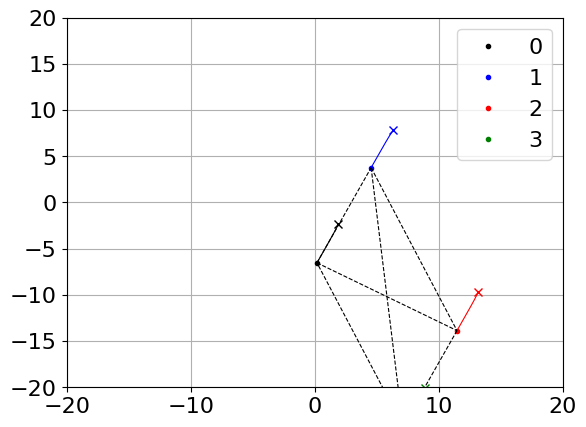

In [194]:
## Launch the simulation and plot #####
#sim_fr.set_velocity(0, 0, 0, 1)

sim_fr.numerical_simulation()
sim_fr.plot()

## Affine formations in $\mathbb{C}^1$

### Square

In [ ]:
## Parameters #####
n = 4
Z = ((1,2), (1,3), (2,3), (2,4), (3,4), (4,1))
p_star = np.array([[-1,-1], [-1,1], [1,1], [1,-1]]) # square
p0 = [[-10,-3], [-5,-2], [10,4], [0,-5]]
tf = 1
h = 10
kappa = 0.1
K = np.eye(n)

## Generate the simulation frame #####
args = {"n":n, "Z":Z, "p_star":p_star, "p0":p0, "tf":tf, "h":h, "kappa":kappa, "K":K, "debug":True}
sim_fr = sim_frame_affine_complex(**args)

In [291]:
## Set a desired velocity vector stack (v_f^*) #####
vx = 0
vy = 0
a = 0

omega = 1
hx = 0
hy = 0

# "a" case
# omega = 1
# hx = 4
# hy = 2

# "b" case
# omega = -3
# hx = -4
# hy = 2

## Design the weights that gerenates such v_f^* #####
mu_matrix_x = np.array([[0,0,0,-1], [0,0,-1,0], [0,1,0,0], [1,0,0,0]])/2
mu_matrix_y = np.array([[0,-1,0,0], [1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

mu_matrix_a = np.array([[0,1,0,1], [1,0,1,0], [0,1,0,1], [1,0,1,0]])/2
mu_matrix_w = np.array([[0,1,0,-1], [-1,0,1,0], [0,-1,0,1], [1,0,-1,0]])/2
mu_matrix_hx = np.array([[0,0,0,1], [0,0,-1,0], [0,1,0,0], [-1,0,0,0]])/2
mu_matrix_hy = np.array([[0,1,0,0], [-1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

sim_fr.set_manual_mu(vx*mu_matrix_x + vy*mu_matrix_y + a*mu_matrix_a + omega*mu_matrix_w + 
                     hx*mu_matrix_hx + hy*mu_matrix_hy)

M (4, 6) B.T (6, 4) K_inv (4, 4)
mu_ij matrix:
 [[ 0.   0.5  0.  -0.5]
 [-0.5  0.   0.5  0. ]
 [ 0.  -0.5  0.   0.5]
 [ 0.5  0.  -0.5  0. ]]
M:
 [[ 0.   0.5  0.  -0.5]
 [-0.5  0.   0.5  0. ]
 [ 0.  -0.5  0.   0.5]
 [ 0.5  0.  -0.5  0. ]]
M@B^T@p_star_c [ 1.-1.j -1.-1.j -1.+1.j  1.+1.j]
 --------- Eigenvalues L_mod
lambda_0 = -10.000000+0.000000j
lambda_1 = -0.000000+0.100000j
lambda_2 = -0.000000-0.100000j
lambda_3 = 0.000000+0.000000j


100%|██████████| 1000/1000 [00:00<00:00, 36874.30it/s]


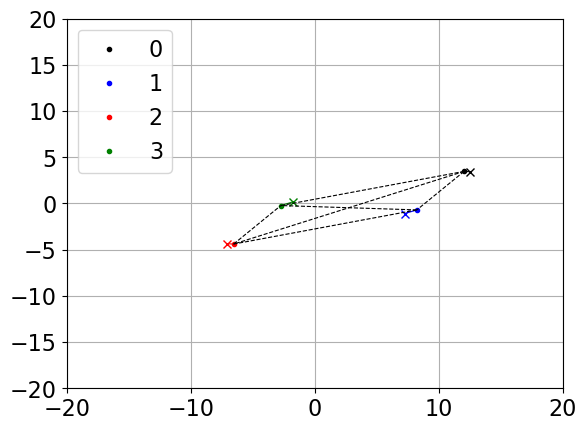

In [326]:
## Launch the simulation and plot #####
#sim_fr.set_velocity(0, 0, 0, 1)

sim_fr.numerical_simulation()
sim_fr.plot()

### Trapezoid

In [242]:
## Parameters #####
n = 4
#Z = ((1,2), (2,3), (3,4), (4,1))
Z = ((1,2), (1,3), (2,3), (2,4), (3,4), (4,1))
p_star = np.array([[-1,-1], [-2,2], [2,2], [1,-1]]) # square
p0 = [[-10,-3], [-5,-2], [10,4], [0,-5]]
tf = 1
h = 3
kappa = 0.1
K = np.eye(n)

## Generate the simulation frame #####
args = {"n":n, "Z":Z, "p_star":p_star, "p0":p0, "tf":tf, "h":h, "kappa":kappa, "K":K, "debug":True}
sim_fr = sim_frame_affine_complex(**args)

Failed to dualize the problem: 'float' object is not iterable
W (6, 6) = 
 [[ 0.2  0.   0.   0.   0.   0. ]
 [ 0.  -0.2  0.   0.   0.   0. ]
 [ 0.   0.   0.1  0.   0.   0. ]
 [ 0.   0.   0.  -0.2  0.   0. ]
 [ 0.   0.   0.   0.   0.2  0. ]
 [ 0.   0.   0.   0.   0.   0.4]]
L (4, 4) = 
 [[ 0.4 -0.2  0.2 -0.4]
 [-0.2  0.1 -0.1  0.2]
 [ 0.2 -0.1  0.1 -0.2]
 [-0.4  0.2 -0.2  0.4]]
 --------- Eigenvalues
lambda_0 = -1.000000
lambda_1 = 0.000000
lambda_2 = -0.000000
lambda_3 = -0.000000


In [243]:
## Set a desired velocity vector stack (v_f^*) #####
vx = -1
vy = -1
a = 0
omega = 0
hx = 0
hy = 0

## Design the weights that gerenates such v_f^* #####
mu_matrix_x = np.array([[0,0,0,-1], [0,0,-1/2,0], [0,1/2,0,0], [1,0,0,0]])/2
mu_matrix_y = np.array([[0,-1,0,-1/2], [1,0,-1/4,0], [0,-1/4,0,1], [-1/2,0,-1,0]])/3

mu_matrix_a = np.array([[0,0,1,0], [0,0,0,2], [2,0,0,0], [0,1,0,0]])/3
mu_matrix_w = np.array([[0,1,0,-1], [-2,0,2,0], [0,-2,0,2], [1,0,-1,0]])/3
mu_matrix_hx = np.array([[0,0,0,1], [0,0,-2/2,0], [0,2/2,0,0], [-1,0,0,0]])/2
mu_matrix_hy = -np.array([[0,-1,0,-1/2], [2,0,-2/4,0], [0,2/4,0,-2], [1/2,0,1,0]])/3

sim_fr.set_manual_mu(vx*mu_matrix_x + vy*mu_matrix_y + a*mu_matrix_a + omega*mu_matrix_w + 
                     hx*mu_matrix_hx + hy*mu_matrix_hy)

M (4, 6) B.T (6, 4) K_inv (4, 4)
mu_ij matrix:
 [[ 0.    0.33  0.    0.67]
 [-0.33  0.    0.33  0.  ]
 [ 0.   -0.17  0.   -0.33]
 [-0.33  0.    0.33  0.  ]]
M:
 [[ 0.    0.33  0.    0.67]
 [-0.33  0.    0.33  0.  ]
 [ 0.   -0.17  0.   -0.33]
 [-0.33  0.    0.33  0.  ]]
M@B^T@p_star_c [-1.-1.j -1.-1.j -1.-1.j -1.-1.j]
 --------- Eigenvalues L_mod
lambda_0 = -2.950000+0.000000j
lambda_1 = -0.000000+0.000000j
lambda_2 = -0.000000-0.000000j
lambda_3 = -0.000000+0.000000j


100%|██████████| 1000/1000 [00:00<00:00, 181823.48it/s]


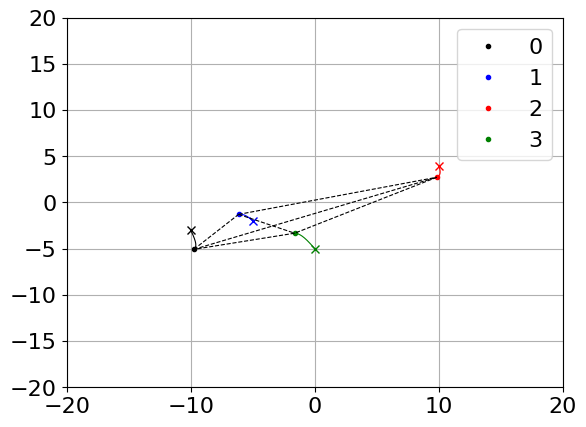

In [244]:
## Launch the simulation and plot #####
#sim_fr.set_velocity(0, 0, 0, 1)

sim_fr.numerical_simulation()
sim_fr.plot()